# **04-02 Bag of Words(BoW)**

---



단어의 등장 순서를 고려하지 않는 빈도수 기반의 단어 표현 방법

## **1. Bag of Words?**

---



단어 순서 고려 X, 출현 빈도(frequency)에만 집중하는 텍스트 데이터의 수치화 표현 방법

BoW 만드는 과정

> 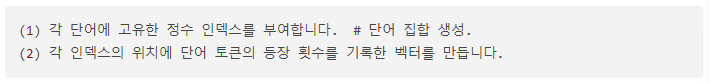

**문서1: 정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다.**

문서1에 대해서 BoW 만듦. 입력된 문서에 대해서 단어 집합(vocaburary)을 만들어 각 단어에 정수 인덱스 할당

In [2]:
pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 36.6 MB/s eta 0:00:00


In [3]:
from konlpy.tag import Okt

okt = Okt()

def build_bag_of_words(document):
  # 온점 제거 및 형태소 분석
  document = document.replace('.', '')
  tokenized_document = okt.morphs(document)

  word_to_index = {}
  bow = []

  for word in tokenized_document:
    if word not in word_to_index.keys():
      word_to_index[word] = len(word_to_index)
      # BoW에 전부 기본값 1을 넣는다.
      bow.insert(len(word_to_index) - 1, 1)
    else:
      # 재등장하는 단어의 인덱스
      index = word_to_index.get(word)
      # 재등장한 단어는 해당하는 인덱스의 위치에 1을 더한다.
      bow[index] = bow[index] + 1

  return word_to_index, bow

In [4]:
doc1 = "정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다."
vocab, bow = build_bag_of_words(doc1)
print('vocabulary :', vocab)
print('bag of words vector :', bow)

vocabulary : {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}
bag of words vector : [1, 2, 1, 1, 2, 1, 1, 1, 1, 1]


## **2. Bag of Words 다른 예제들**

---



**문서2: 소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다.**

In [6]:
doc2 = '소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다.'

vocab, bow = build_bag_of_words(doc2)
print('vocabulary :', vocab)
print('bag of words vector :', bow)

vocabulary : {'소비자': 0, '는': 1, '주로': 2, '소비': 3, '하는': 4, '상품': 5, '을': 6, '기준': 7, '으로': 8, '물가상승률': 9, '느낀다': 10}
bag of words vector : [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]


**문서3: 정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다. 소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다.**

In [7]:
doc3 = doc1 + ' ' + doc2
vocab, bow = build_bag_of_words(doc3)
print('vocabulary :', vocab)
print('bag of words vector :', bow)

vocabulary : {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9, '는': 10, '주로': 11, '소비': 12, '상품': 13, '을': 14, '기준': 15, '으로': 16, '느낀다': 17}
bag of words vector : [1, 2, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1]


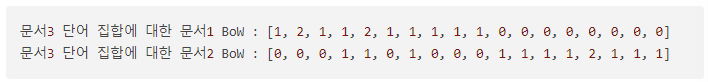

## **3. CountVectorizer 클래스로 BoW 만들기**

---



In [8]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['you know I want your love. because I love you.']
vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수를 기록
print('bag of words vector :', vector.fit_transform(corpus).toarray())

# 각 단어의 인덱스가 어떻게 부여되었는지를 출력
print('vocabulary :',vector.vocabulary_)

bag of words vector : [[1 1 2 1 2 1]]
vocabulary : {'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


## **4. 불용어 제거한 BoW 만들기**

---



In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

#### **(1) 사용자가 직접 정의한 불용어 사용**

In [10]:
text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words=["the", "a", "an", "is", "not"])
print('bag of words vector :',vect.fit_transform(text).toarray())
print('vocabulary :',vect.vocabulary_)

bag of words vector : [[1 1 1 1 1]]
vocabulary : {'family': 1, 'important': 2, 'thing': 4, 'it': 3, 'everything': 0}


#### **(2) CountVectorizer에서 제공하는 자체 불용어 사용**

In [11]:
text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words="english")
print('bag of words vector :',vect.fit_transform(text).toarray())
print('vocabulary :',vect.vocabulary_)

bag of words vector : [[1 1 1]]
vocabulary : {'family': 0, 'important': 1, 'thing': 2}


#### **(3) NLTK에서 지원하는 불용어 사용**

In [13]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
text = ["Family is not an important thing. It's everything."]
stop_words = stopwords.words("english")
vect = CountVectorizer(stop_words=stop_words)
print('bag of words vector :',vect.fit_transform(text).toarray())
print('vocabulary :',vect.vocabulary_)

bag of words vector : [[1 1 1 1]]
vocabulary : {'family': 1, 'important': 2, 'thing': 3, 'everything': 0}
